# Import libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/bdtol/flatiron-ds/module2/project_2/Regression-Analysis-House-Sales/csv-files/kc_house_data_clean.csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


# What conditon house should a new homeowner buy?

In [5]:
# Target demographic are those that want to buy the nicest house at the lowest cost

Text(0.5, 1.0, 'House Condition and Price')

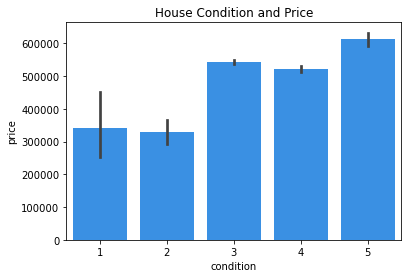

In [6]:
sns.barplot(x='condition', y='price', data=df, color= 'dodgerblue');
plt.title('House Condition and Price')

In [7]:
condition_4 = df.loc[df['condition'] == 4]

# What year has the optimal price

In [8]:
con_year = df.groupby((condition_4.yr_built//10)*10).mean()

In [9]:
con_year.drop(['yr_built'],axis=1, inplace=True)

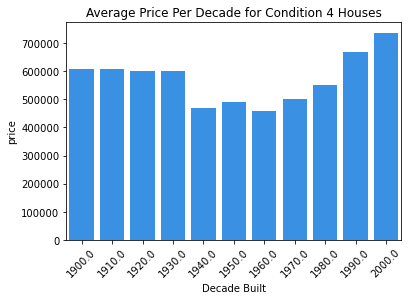

In [10]:
sns.barplot(x=con_year.index, y= con_year.price, color= 'dodgerblue')
plt.xticks(rotation=45);
plt.title('Average Price Per Decade for Condition 4 Houses')
plt.xlabel('Decade Built');

# When to buy

In [11]:
condition_4['month'] = [condition_4.iloc[i][1][5:7] for i in range(len(condition_4['date']))]

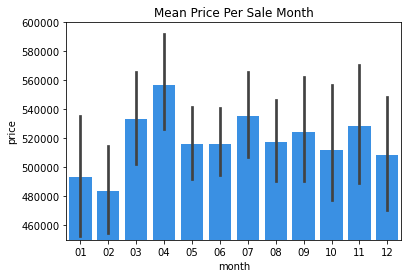

In [12]:
sns.barplot(x='month', y='price', data=condition_4, color= 'dodgerblue')
plt.ylim(450000, 600000);
plt.title('Mean Price Per Sale Month');


# Where to buy

In [13]:
loc_map = condition_4.loc[(condition_4['yr_built'] >= 1960) & (condition_4['yr_built'] <= 1969)]

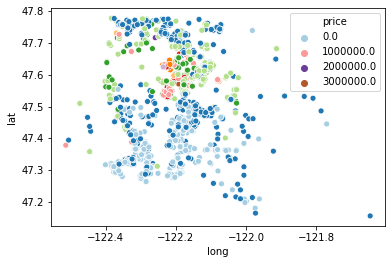

In [14]:
sns.scatterplot(x='long', y='lat', hue='price', data=loc_map, palette='Paired');

In [18]:
import plotly.express as px

fig = px.scatter_mapbox(loc_map, lat="lat", lon="long", hover_name="id", hover_data=["price"], 
                        color="price", size='price', color_discrete_sequence=["red"], zoom=10, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()